In [2]:

pip install sklearn
pip install tensorflow
pip install 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [5]:
df = pd.read_csv('Claims.csv')

In [7]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [9]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [10]:
df.shape

(15420, 33)

In [11]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [21]:
df.isnull().sum() 

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [12]:
pd.set_option('display.max_columns', None)  # Set the option to display all columns
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [13]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1})

In [14]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [15]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [16]:
df = df[df['MonthClaimed'] != '0']

In [17]:
df['Month'] = pd.to_datetime(df['Month'], format='%b')
df['Month'] = df['Month'].dt.month

In [18]:
df['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [19]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

In [20]:
df['MonthClaimed'] = pd.to_datetime(df['MonthClaimed'], format='%b')
df['MonthClaimed'] = df['MonthClaimed'].dt.month

In [21]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map(day_mapping)

In [22]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,Honda,Urban,1,1,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,2,Honda,Urban,0,1,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,4,Honda,Urban,3,11,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,5,Toyota,Rural,4,7,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,0,Honda,Urban,1,2,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [23]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])

In [25]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,6,Urban,1,1,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,2,6,Urban,0,1,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,4,6,Urban,3,11,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,5,17,Rural,4,7,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,0,6,Urban,1,2,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [26]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['AccidentArea', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [28]:
categorical_columns

['AccidentArea',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [29]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['AccidentArea',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [30]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,6,1,1,1,1,1,0.0,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
1,1,3,2,6,1,0,1,4,0,0.0,34,0,4,1,5,0,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1
2,10,5,4,6,1,3,11,2,0,1.0,47,0,4,1,5,0,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1
3,6,2,5,17,0,4,7,1,0,1.0,65,1,2,1,0,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2
4,1,5,0,6,1,1,2,2,1,0.0,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1


In [31]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [32]:
y = df['FraudFound_P']
X = df.drop('FraudFound_P', axis = 1)

In [33]:
X.describe()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15308.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.00000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,6.391660,2.788637,2.808029,10.114858,0.896426,1.828394,6.355730,2.694079,0.156949,0.694082,39.858292,0.271743,1.260717,0.398210,1.291588,7710.90168,8.482846,407.704780,2.487840,2.990920,1.991374,1.463000,4.799144,4.892211,0.027758,0.005642,0.015630,2.003308,2.888514,0.098839,1994.866528,1.036384
std,3.473131,1.287611,1.979329,5.282987,0.304716,1.453476,3.465167,1.259082,0.363765,0.460810,13.488996,0.444872,1.190994,0.538864,1.837352,4451.37980,4.599798,43.952379,1.119482,0.167143,0.125762,1.129839,1.140106,1.395396,0.164284,0.074906,0.124043,1.110652,0.451095,0.383484,0.803309,0.782336
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3856.50000,5.000000,400.000000,1.000000,3.000000,2.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000
50%,6.000000,3.000000,3.000000,9.000000,1.000000,2.000000,6.000000,3.000000,0.000000,1.000000,38.000000,0.000000,1.000000,0.000000,0.000000,7711.00000,8.000000,400.000000,2.000000,3.000000,2.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000
75%,9.000000,4.000000,4.000000,13.000000,1.000000,3.000000,9.000000,4.000000,0.000000,1.000000,48.000000,1.000000,2.000000,1.000000,1.000000,11565.50000,12.000000,400.000000,3.000000,3.000000,2.000000,3.000000,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000
max,12.000000,5.000000,6.000000,18.000000,1.000000,6.000000,12.000000,5.000000,1.000000,1.000000,80.000000,1.000000,8.000000,2.000000,5.000000,15420.00000,16.000000,700.000000,4.000000,4.000000,2.000000,3.000000,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000


In [34]:
print(df.shape)

print(df.dtypes)

print(df.isnull().sum())

print(df.describe())

(15419, 33)
Month                     int64
WeekOfMonth               int64
DayOfWeek                 int64
Make                      int32
AccidentArea              int32
DayOfWeekClaimed          int64
MonthClaimed              int64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus           float64
Age                       int64
Fault                     int32
PolicyType                int32
VehicleCategory           int32
VehiclePrice              int32
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident      int32
Days_Policy_Claim         int32
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder         int32
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim       int32
NumberOfCars              in

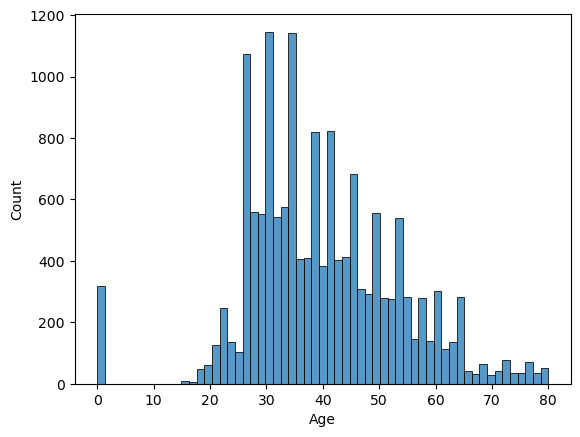

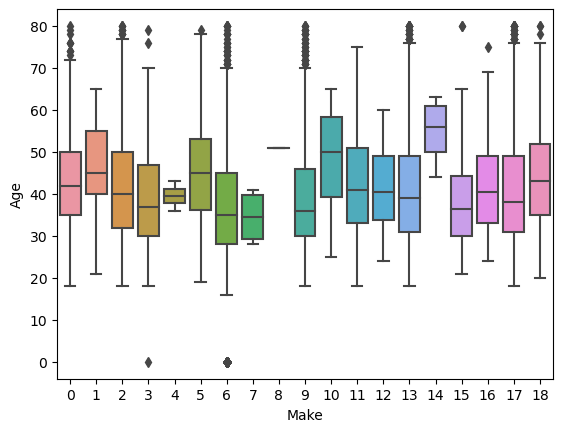

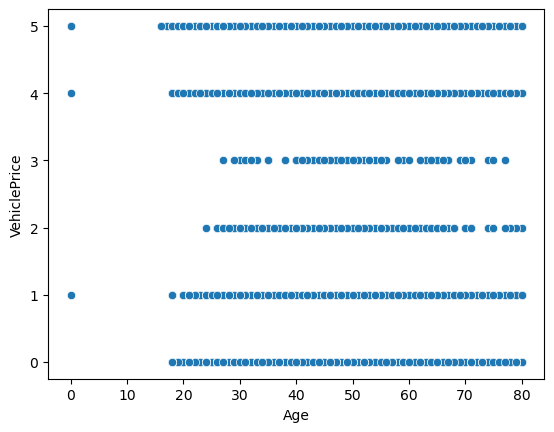

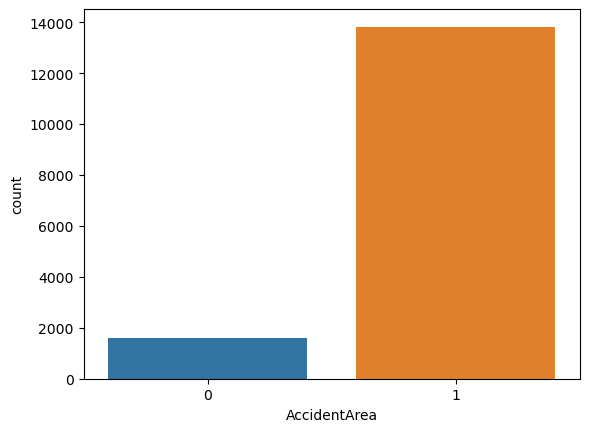

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a numerical variable
sns.histplot(df['Age'])
plt.show()

# Box plot of a numerical variable
sns.boxplot(x='Make', y='Age', data=df)
plt.show()

# Scatter plot of two numerical variables
sns.scatterplot(x='Age', y='VehiclePrice', data=df)
plt.show()

# Bar plot of a categorical variable
sns.countplot(x='AccidentArea', data=df)
plt.show()

In [40]:
df_if = pd.read_csv('C:/Users/skollu/Downloads/fraud_oracle.csv')

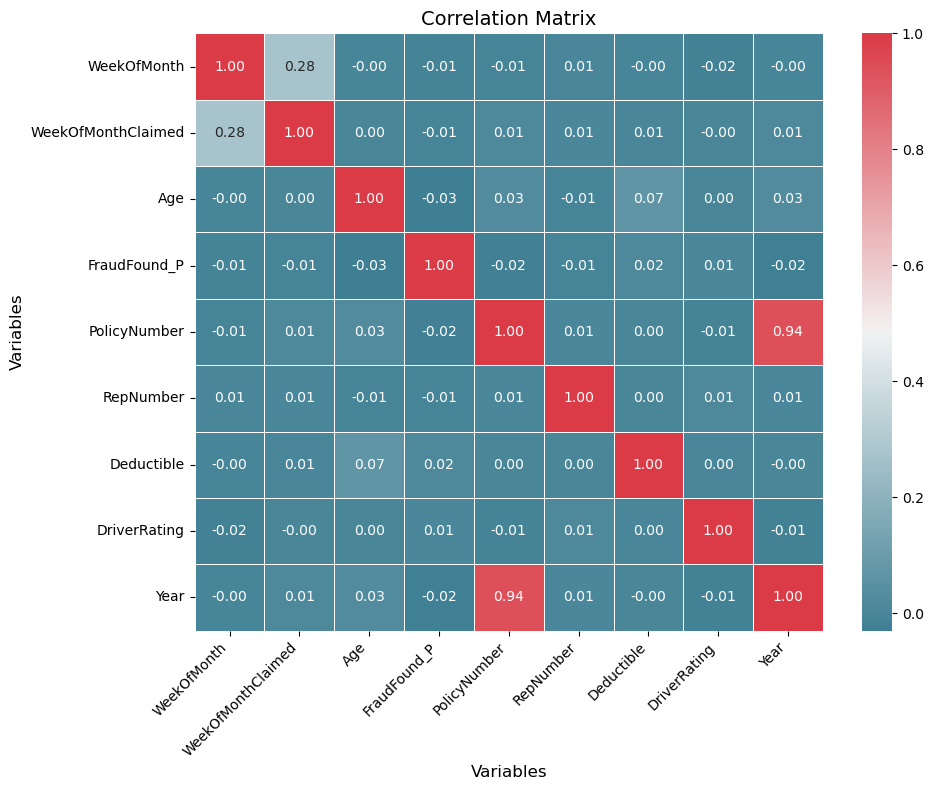

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_if.corr()

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap with custom color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title("Correlation Matrix", fontsize=14)
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust the plot layout to prevent cutoff of labels
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
# Drop rows with NaN values
df.dropna(axis=0, inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features separately for train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
import tensorflow as tf
import tensorflow.keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.1),
                          metrics = ['accuracy'])

# Fit the model
history = insurance_model_1.fit(X_train_scaled, y_train, epochs = 50)

In [ ]:
insurance_model_1.evaluate(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [46]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

NameError: name 'y_pred' is not defined

# Logistic Regression Model Implementation


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\skollu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9363161332462443
Confusion Matrix:
 [[2867    0]
 [ 195    0]]


# ISOLATION FOREST MODEL

In [57]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter based on the expected fraud rate
model.fit(X_train_scaled)

# Predict anomalies on the test set
anomaly_scores = model.decision_function(X_test_scaled)
predictions = model.predict(X_test_scaled)

# Identify the fraud cases in the test set
fraud_indices = [index for index, pred in enumerate(predictions) if pred == -1]
fraud_cases = X_test.iloc[fraud_indices]

# Print the fraud cases in the test set
fraud_cases
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels for the test set
# Adjust y_test to reflect the actual true labels in your dataset

# Convert -1 to 0 for fraud cases in predictions
binary_predictions = [0 if pred == -1 else 1 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)

print(f"Accuracy: {accuracy}")


# from sklearn.metrics import confusion_matrix

# # Assuming 'y' is the true labels and 'predictions' is the predicted labels
# conf_matrix = confusion_matrix(y, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

Accuracy: 0.0728282168517309


# DECISION TREE MODEL IMPLEMENTATION

In [58]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred = model.predict(X_test)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9085564990202482

Confusion Matrix:
 [[2723  144]
 [ 136   59]]
